In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score, auc,r2_score,mean_squared_error
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from joblib import load
df=pd.read_csv("D:/ammar college/Level 3/semester2/Advanced ML/bank.csv")

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','deposit']

label_encoder = LabelEncoder()
keys_of_encoding={}
for i in categorical_cols:
    uniq =df[i].unique()
    labels= label_encoder.fit_transform(df[i].unique())
    keys_of_encoding[i]=dict(zip(uniq,labels))

for i in categorical_cols:
    df[i]=label_encoder.fit_transform(df[i])
    
X = df.drop(columns=['deposit'])  # Features
y = df['deposit']  #Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)



NN_model = load('D:/ammar college/Level 3/semester2/Advanced ML/NN_model.joblib')
history = load('D:/ammar college/Level 3/semester2/Advanced ML/history_NN_model.joblib')
# Evaluate the model
accuracy = NN_model.evaluate(X_test, y_test)[1]
predictions = NN_model.predict(X_test)
print("Neural Network accuracy: ",accuracy)






105/105 [==============================] - 0s 1ms/step
Neural Network accuracy:  0.8109883666038513


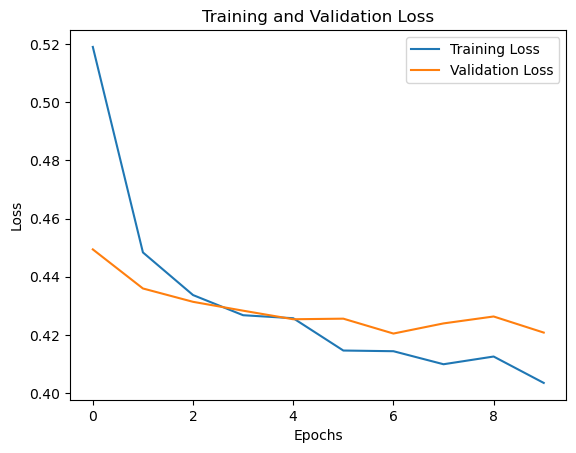

In [18]:
# Plotting Training and Validation Loss Over Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

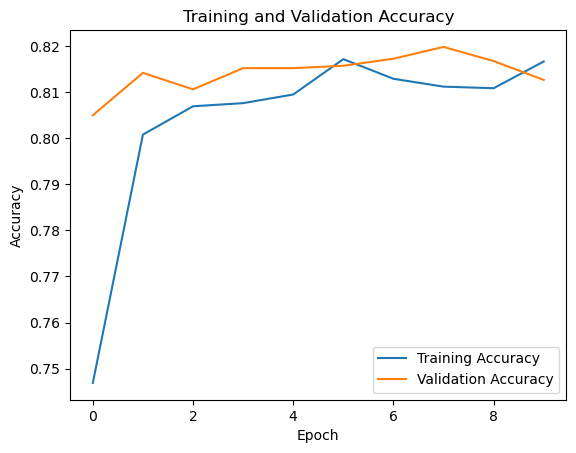

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

105/105 [==============================] - 1s 5ms/step


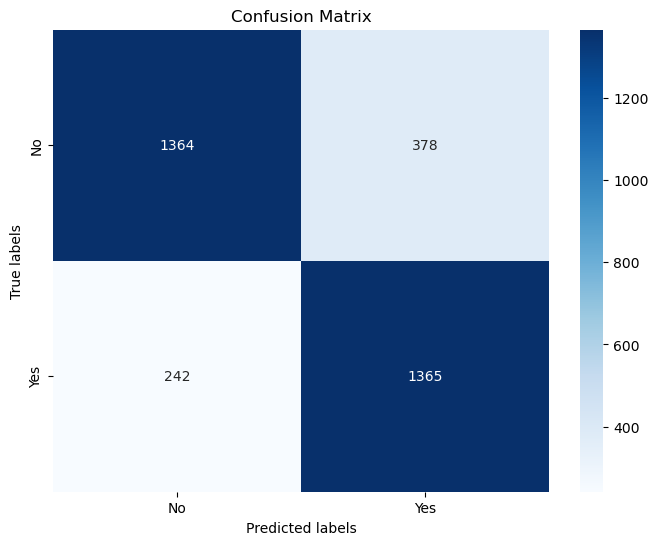

In [15]:
# Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

y_pred = (NN_model.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(y_test, y_pred)

105/105 [==============================] - 1s 4ms/step


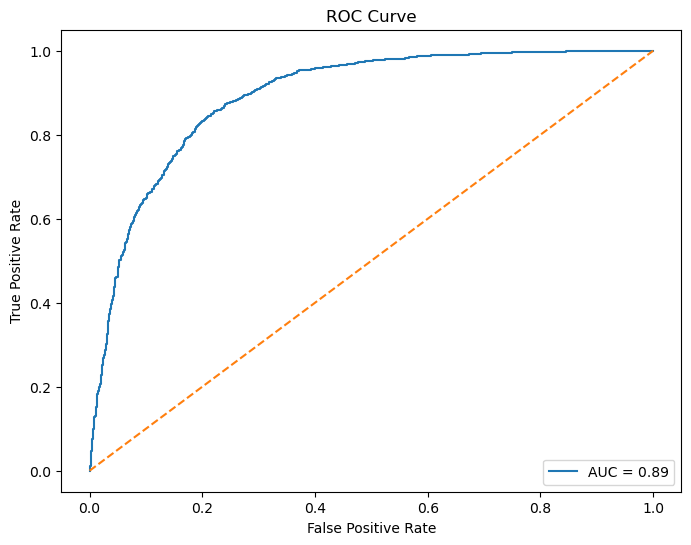

In [17]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc_score = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

y_pred_prob = NN_model.predict(X_test)
plot_roc_curve(y_test, y_pred_prob)